## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data Cleaning and Consistency checks
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# This option ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create path
path = r'C:\Users\mngit\OneDrive\Data Analytics\Project Excercises\Achievement 6\World Happiness Report' 

In [4]:
#Import happiness Data set
df_happiness = pd.read_csv(os.path.join(path, '02 Data','Wrangled Data', 'happiness_wrangled.csv'), index_col = 0)

In [5]:
#check original shape
df_happiness.shape

(785, 11)

### 2. Data cleaning and consistency checks

In [6]:
df_happiness.head(5)

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity
0,Afghanistan,2015,Southern Asia,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365
1,Afghanistan,2016,Southern Asia,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313
2,Afghanistan,2017,Southern Asia,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061
3,Afghanistan,2018,Southern Asia,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036
4,Afghanistan,2019,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [7]:
#check variable type
df_happiness.dtypes

Country                          object
Year                              int64
Region                           object
Happiness Rank                  float64
Happiness Score                 float64
Economy (GDP per Capita)        float64
Social Support                  float64
Health (Life Expectancy)        float64
Freedom to make life choices    float64
Lack of Corruption              float64
Donations to Charity            float64
dtype: object

In [8]:
#create list excluding categorical variables
vars_list = ['Year', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Social Support', 'Health (Life Expectancy)', 'Freedom to make life choices','Lack of Corruption','Donations to Charity']

In [9]:
#create new dataframe excluding categorical variables
df_happinesscopy = df_happiness.copy()
df_happiness_ML = df_happiness.drop(['Year','Country', 'Region'], axis= 'columns')

In [10]:
#confirm new shape
df_happiness_ML.shape

(785, 8)

In [11]:
df_happiness_ML.head(5)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity
0,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365
1,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313
2,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061
3,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036
4,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025


### 3. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_happiness_ML).score(df_happiness_ML) for i in range(len(kmeans))] 

score

[-1656470.971175516,
 -416010.4390670722,
 -184076.2447654771,
 -103630.17698896432,
 -66147.33549271959,
 -46208.150717827244,
 -33865.124409013515,
 -25904.466473808276,
 -20664.89023412932]

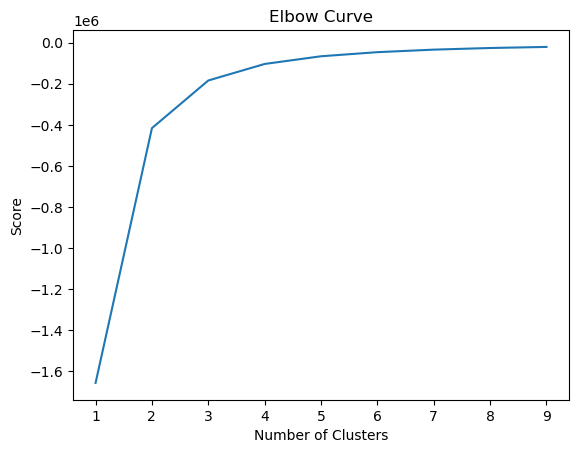

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Elbow_curve.png')) #Export Elbow curve
pl.show()

#### The breaking point of the curve is between 2-3 indicating that the optimal number of clusters to use is 3

### 3. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_happiness_ML)

KMeans(n_clusters=3)

In [18]:
# Attach a new column to dataframe with the resulting clusters
df_happiness_ML['clusters'] = kmeans.fit_predict(df_happiness_ML)

In [19]:
df_happiness_ML.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom to make life choices,Lack of Corruption,Donations to Charity,clusters
0,153.0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,0
1,154.0,3.360,0.382,0.110,0.173,0.164,0.071,0.313,0
2,141.0,3.794,0.401,0.582,0.181,0.106,0.312,0.061,0
3,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,0
4,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0


In [20]:
df_happinesscopy['clusters'] = df_happiness_ML['clusters']
df_happinesscopy.head()
df_happinesscopy['clusters'].value_counts()
df_happinesscopy.to_csv('country_clusters.csv')

In [21]:
# check how many observations fall into each cluster
df_happiness_ML['clusters'].value_counts()

1    264
2    262
0    259
Name: clusters, dtype: int64

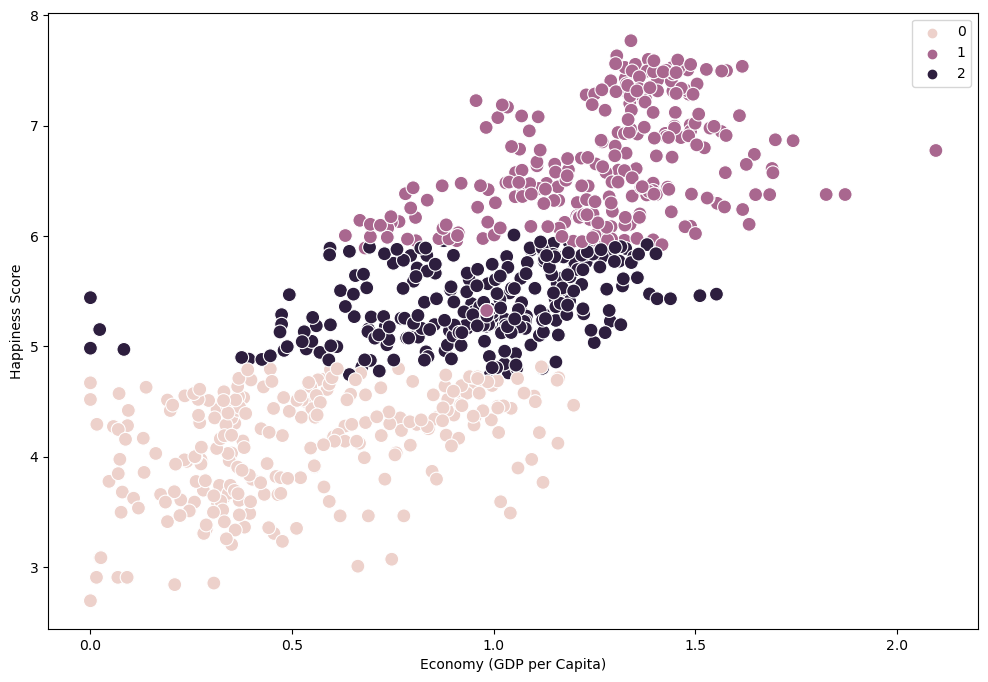

In [22]:
# i) Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Economy (GDP per Capita)'], y=df_happiness_ML['Happiness Score'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Economy.png')) #Export Cluster plot
plt.show()

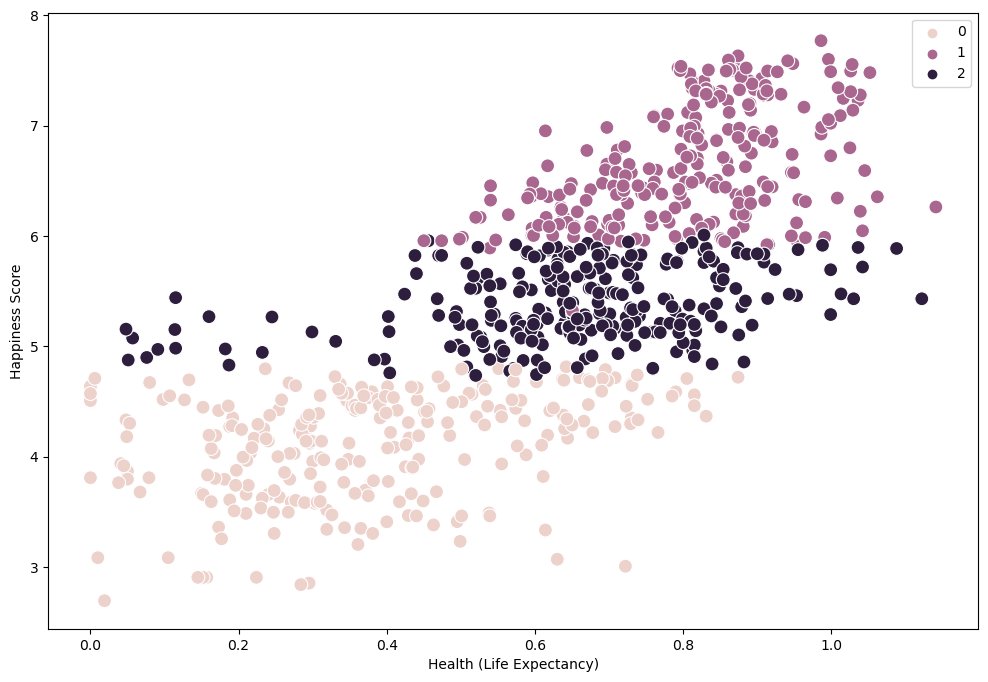

In [23]:
# ii) Plot the clusters for the "Health (Life Expectancy)" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Health (Life Expectancy)'], y=df_happiness_ML['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Health (Life Expectancy)') 
plt.ylabel('Happiness Score') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Health.png')) #Export Cluster plot
plt.show()

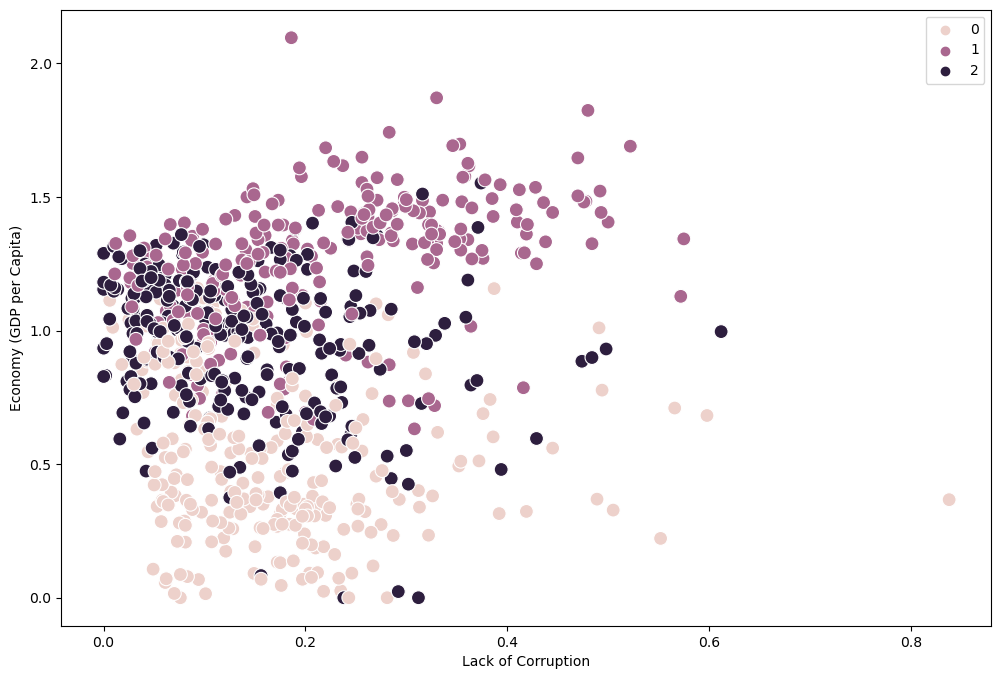

In [24]:
# iii) Plot the clusters for the "Lack of Corruption" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Lack of Corruption'], y=df_happiness_ML['Economy (GDP per Capita)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Lack of Corruption') 
plt.ylabel('Economy (GDP per Capita)') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Corruption.png')) #Export Cluster plot
plt.show()

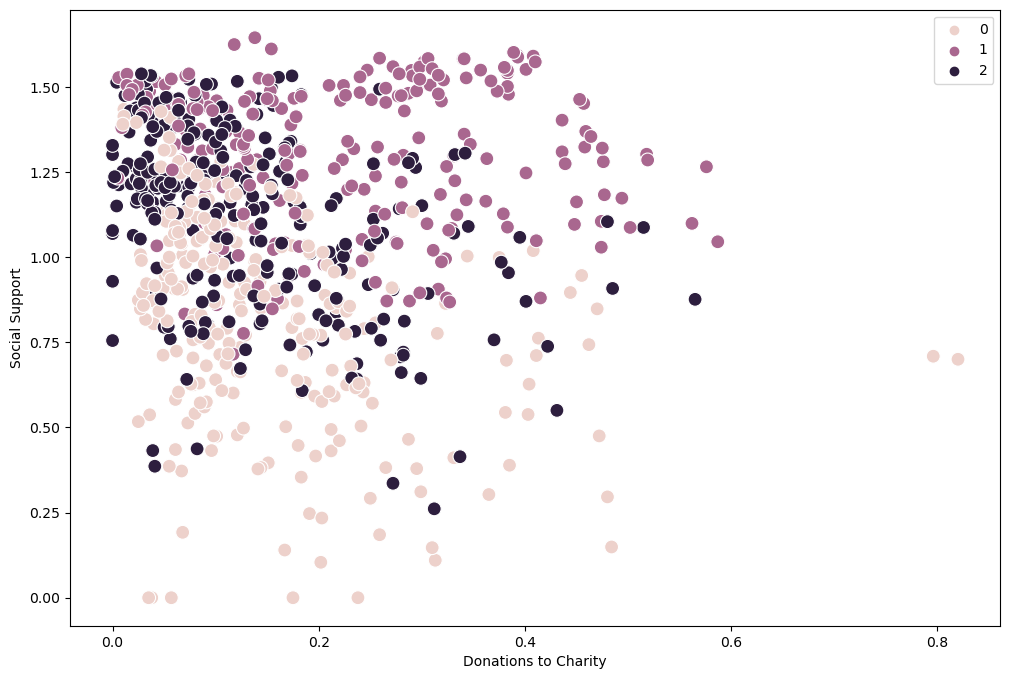

In [25]:
# iv) Plot the clusters for the "Donations to Charity" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_happiness_ML['Donations to Charity'], y=df_happiness_ML['Social Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Donations to Charity') 
plt.ylabel('Social Support') 
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Cluster_Happiness_Family.png')) #Export Cluster plot
plt.show()

#### Observations
##### i)  "Happiness Score" and "Economy (GDP per Capita)" variables

######      - Purple cluster has mainly low to moderate GDP and low Happiness Score of less than 5
######      - Dark purple clusters represent countries having moderate GDP and Happiness Score apart from 4 points that have very low GDP but                         still  show  moderate  Happiness Score.
######      - The pink cluster represents countries with above average  GDP and also above average Happiness Score with the exception of 1 point                        that has average Happiness Score

##### ii)  "Health (Life Expectancy)" and "Happiness Score" variables
######      - The dark purple cluster has low, medium and High Health (Life Expectancy) but only has average Happiness scores
######      - The entire pink cluster has only high Happiness Scores and medium to high Health (Life Expectancy) 

##### iii)   "Lack of Corruption" and "Economy (GDP per Capita)"
######      - All the clusters are  mainly in the bottom right corner of the chart apart from a few points - This could be an indication that GDP of a                               country doesn't indicate high or low corruption levels

##### iv)    "Donations to Charity" and "Social Support"
######      -  All the clusters are  mainly in the top right corner and center of the chart show that many countries indicate having medium t high                               social support but that doesn't affect how generous they are

In [26]:
# relabel clusters from numbers to color names

df_happiness_ML.loc[df_happiness_ML['clusters'] == 2, 'cluster'] = 'dark purple'
df_happiness_ML.loc[df_happiness_ML['clusters'] == 1, 'cluster'] = 'purple'
df_happiness_ML.loc[df_happiness_ML['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
# calculate descriptive statistics for the clusters

df_happiness_ML.groupby('cluster').agg({'Health (Life Expectancy)':['mean', 'median'], 
                                        'Social Support':['mean', 'median'], 
                                        'Economy (GDP per Capita)':['mean', 'median'],
                                        'Donations to Charity':['mean', 'median'],             
                                        'Happiness Score':['mean', 'median']})

Health (Life Expectancy)         Social Support          \
                                mean  median           mean  median   
cluster                                                               
dark purple                  0.65800  0.6645       1.123359  1.1625   
pink                         0.38361  0.3590       0.816726  0.8520   
purple                       0.80046  0.8145       1.298184  1.3190   

            Economy (GDP per Capita)         Donations to Charity          \
                                mean  median                 mean  median   
cluster                                                                     
dark purple                 0.964321  1.0030             0.130237  0.1005   
pink                        0.528463  0.4720             0.151703  0.1130   
purple                      1.257831  1.3005             0.209061  0.1720   

            Happiness Score          
                       mean  median  
cluster                              
dark purple        5.389935  5.3430  
pink               4.117104  4.2360  
purple             6.600720  6.4885

#### Observations
##### •	The Pink cluster has the best stats for all categories with a significantly higher mean Happiness Score of 6.6
##### •  Health (Life Expectancy) of the purple cluster is much lower than the other two clusters
##### •  The dark purple cluster has a perfectly symmetrical distribution of Health (Life Expectancy)


### Future steps of an analytics pipeline
####  1. Determine variable similarities between countries that have high Happiness Score
####  2. Analyze if Happiness Scores of each country are consistent year on year
####  3. Investigate if Happiness Score by Region


In [28]:
 #exporting cleaned  data frame
df_happiness_ML.to_csv(os.path.join(path, '02 Data','Wrangled Data', 'df_happiness_ML_Cluster.csv'))